 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
%matplotlib inline

Importing Data

In [2]:
# Importing Data

pdf_train = pd.read_excel("Train.xlsx")
pdf_test  = pd.read_excel("Test.xlsx")

df   =  pdf_train     # train data is stored in df
df_t =  pdf_test      # test data is stored in df_t

print(df.shape)     # Train DataFrame has 8523 rows and 12 columns

print(df_t.shape)   # The DataFrame has 5681 rows and 11 columns

(8523, 12)
(5681, 11)


Exploring DATA

In [3]:

df.head()

# Variable Description

# Item_Identifier            ->    Unique product ID

# Item_Weight                ->    Weight of product

# Item_Fat_Content           ->    Whether the product is low fat or not

# Item_Visibility            ->    The % of total display area of all products in a store
#                                  allocated to the particular product
  
# Item_Type                  ->    The category to which the product belongs

# Item_MRP                   ->    Maximum Retail Price (list price) of the product

# Outlet_Identifier          ->    Unique store ID

# Outlet_Establishment_Year  ->    The year in which store was established

# Outlet_Size                ->    The size of the store in terms of ground area covered

# Outlet_Location_Type       ->    The type of city in which the store is located

# Outlet_Type                ->    Whether the outlet is just a grocery store or some sort of supermarket

# Item_Outlet_Sales          ->    Sales of the product in the particulat store. This is the outcome variable to be
#                                  predicted.

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_t.head()     # Test data has 1 column "Item_Outlet_Sales" less. This makes sense. Test data
                # should always have one column less

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
print(df.dtypes)   # variables and their types in train dataset
df.isnull().sum()      #  Here we have 1463 Missing values in column 'Item_Weight'  and 2410 in 'Outlet_Size'

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df.isnull().sum()      #  Here we have 1463 Missing values in column 'Item_Weight'  and 2410 in 'Outlet_Size'

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df.describe()      # Finding Quartile 
                   # here we can see that 'item_visiblity' has minimum as 0 which is not possible 
                   # we can treat it as missing values

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Exploring Features

In [8]:
df['Item_Fat_Content'].unique()           # mismatched factor levels for low fat

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [9]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [10]:
df['Outlet_Size'].unique()              #Outlet_Size has a unmatched factor levels 'nan'


array(['Medium', nan, 'High', 'Small'], dtype=object)

In [11]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [12]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

Here the Item_Fat_Content "mismatched factor level" problem is solved by replacing the values

In [13]:

df["Item_Fat_Content"]= df["Item_Fat_Content"].str.replace("low fat", "Low Fat", case = True)

df["Item_Fat_Content"]= df["Item_Fat_Content"].str.replace("LF", "Low Fat", case = True)

df["Item_Fat_Content"]= df["Item_Fat_Content"].str.replace("reg", "Regular", case = True)



In [14]:
df['Item_Fat_Content'].unique()   

array(['Low Fat', 'Regular'], dtype=object)

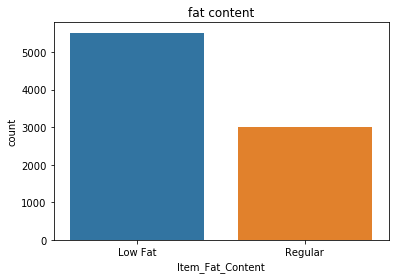

In [15]:
sns.countplot(x='Item_Fat_Content', data=df)           
plt.title('fat content')
plt.show()

# Notice there are many more Low Fat items than Regular Fat items.

Outlet_Size has a unmatched factor levels 'nan' problem is solved


In [16]:
df['Outlet_Size'].unique()    

array(['Medium', nan, 'High', 'Small'], dtype=object)

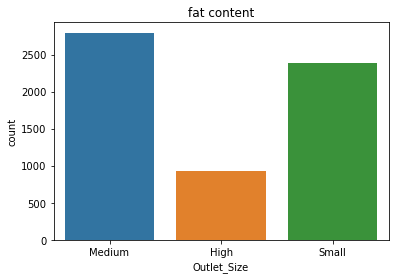

In [17]:
sns.countplot(x='Outlet_Size', data=df)           

plt.title('fat content')
plt.show()

Here we can see that 'item_visiblity' has minimum as 0 problem is solved by replacing with mean

In [18]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [19]:
df['Item_Visibility'] = df['Item_Visibility'].replace(0.000000, np.nan)   # first change the 0.00 value with NaN
df['Item_Visibility'].fillna((df['Item_Visibility'].mean()), inplace=True)
df.head()




,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Removing Null Values from Item_Weight column

In [20]:
df['Item_Weight'].fillna((df['Item_Weight'].mean()), inplace=True)




In [21]:
df.isnull().sum()  

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Outlet_Size problem is not solved

Visulization

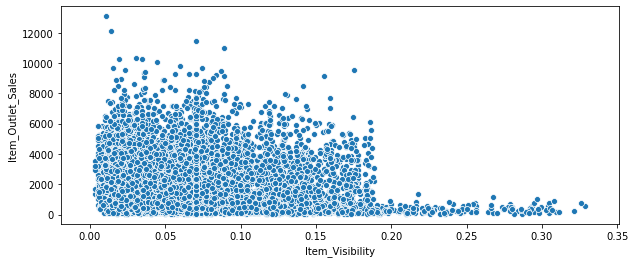

In [22]:
fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)

g = sns.scatterplot(x="Item_Visibility", y="Item_Outlet_Sales" ,data=df, ax=ax)

# majority of sales has been obtained from products having visibility less than 0.2. This suggests that
# item_visibility < 2 must be an important factor in determining sales.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

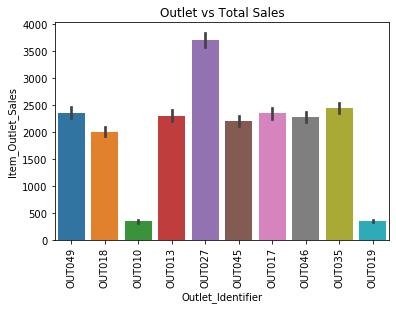

In [23]:
sns.barplot(x="Outlet_Identifier", y="Item_Outlet_Sales", data=df )
plt.title('Outlet vs Total Sales')
plt.xticks(rotation = 90)

# The OUT027 has contributed to majority of sales. OUT19 and OUT10 Contributed Least

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

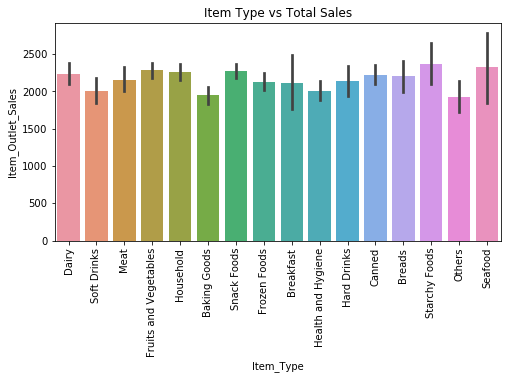

In [24]:
fig_dims = (8, 4)
fig, ax = plt.subplots(figsize=fig_dims)

g = sns.barplot(x="Item_Type", y="Item_Outlet_Sales", data=df, ax=ax)

plt.title('Item Type vs Total Sales')
plt.xticks(rotation = 90)

# Fruits and Vegetables contribute to the highest amount of outlet sales followed by snack foods
# and household products.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

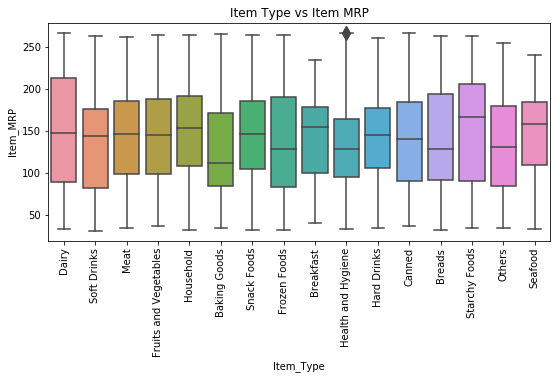

In [25]:
fig_dims = (9, 4)
fig, ax = plt.subplots(figsize=fig_dims)

g = sns.boxplot(x="Item_Type", y="Item_MRP", data=df, width=0.8, fliersize=10, ax=ax)
plt.title('Item Type vs Item MRP')
plt.xticks(rotation = 90)

# Fruits and Vegetables contribute to the highest amount of outlet sales followed by snack foods
# and household products.

In [26]:
df.apply(lambda x: len(x.unique()))  

# There are 1559 products and 10 outlets and 16 types of items with 4 outlet types

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [27]:
Outlet_Count = df['Outlet_Identifier'].value_counts()       # Count of Outlet Identifiers
print(Outlet_Count)

OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


In [28]:
Item_Type_Count = df['Item_Type'].value_counts()            # Count of Item Type
print(Item_Type_Count)

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


In [29]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [30]:
Item_Count = df['Item_Identifier'].value_counts()            # Count of Item Type
print(Item_Count)

FDW13    10
FDG33    10
NCL31     9
NCJ30     9
FDG09     9
         ..
DRF48     1
FDQ60     1
FDY43     1
FDK57     1
FDN52     1
Name: Item_Identifier, Length: 1559, dtype: int64


In [31]:
#a = pd.DataFrame(df.Outlet_Establishment_Year,2013-df.Outlet_Establishment_Year) 

df.Outlet_Establishment_Year=df.Outlet_Establishment_Year.apply(lambda x : 2013-x)
# This suggests that outlets established in 1999 were 14 years old in 2013 and so on.
# We can conclude that older the store larger the loyal customer base


In [32]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,14,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,4,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,14,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,15,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.070482,Household,53.8614,OUT013,26,High,Tier 3,Supermarket Type1,994.7052


In [33]:
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])            #First two characters of Item_Identifier
 
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})    #Rename
df['Item_Type_Combined'].value_counts()  





Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [34]:
df=df.drop(['Item_Type'], axis=1)    # Removing Item_Type (No Longer Needed since features has been extracted)




In [35]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,249.8092,OUT049,14,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,48.2692,OUT018,4,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,141.6180,OUT049,14,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.070482,182.0950,OUT010,15,NaN,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Low Fat,0.070482,53.8614,OUT013,26,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


In [36]:
df['Item_Weight'].fillna((df['Item_Weight'].mean()), inplace=True)

df.Outlet_Size=df.Outlet_Size.fillna('Other')


Finding Correlation Between Variables

Finding Correlation Between Item_Weight and Item_Visibility

In [37]:
# The Pearson correlation coefficient (named for Karl Pearson) 
# can be used to summarize the strength of the linear relationship between two data samples.


from scipy.stats import pearsonr
corr, _ = pearsonr(df.Item_Weight, df.Item_Visibility)
print('Pearsons correlation: %.3f' % corr)

# It has weak Linear Correlation

Pearsons correlation: -0.018


In [38]:
# Two variables may be related by a nonlinear relationship,
# such that the relationship is stronger or weaker across 
# the distribution of the variables.

# In this case, the Spearman’s correlation coefficient 
# (named for Charles Spearman) can be used to summarize 
# the strength between the two data samples.


from scipy.stats import spearmanr

coef, p = spearmanr(df.Item_Weight, df.Item_Visibility)
print('Spearmans correlation coefficient: %.3f' % coef)

alpha = 0.05 
       
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: -0.018
Samples are uncorrelated (fail to reject H0) p=0.096


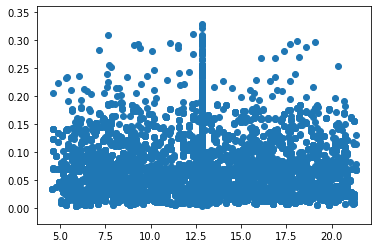

In [39]:
plt.scatter(df.Item_Weight, df.Item_Visibility)
plt.show()

# Highly Non Linear

Finding Correlation Between Item_Weight and Item_MRP

In [40]:
# The Pearson correlation coefficient (named for Karl Pearson) 
# can be used to summarize the strength of the linear relationship between two data samples.


from scipy.stats import pearsonr
corr, _ = pearsonr(df.Item_Weight, df.Item_MRP)
print('Pearsons correlation: %.3f' % corr)

# It has weak Linear Correlation

Pearsons correlation: 0.025


In [41]:
# Two variables may be related by a nonlinear relationship,
# such that the relationship is stronger or weaker across 
# the distribution of the variables.

# In this case, the Spearman’s correlation coefficient 
# (named for Charles Spearman) can be used to summarize 
# the strength between the two data samples.


from scipy.stats import spearmanr

coef, p = spearmanr(df.Item_Weight, df.Item_MRP)
print('Spearmans correlation coefficient: %.3f' % coef)

alpha = 0.05 
       
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.026
Samples are correlated (reject H0) p=0.015


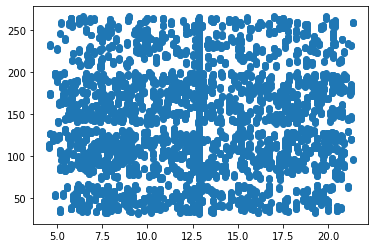

In [42]:
plt.scatter(df.Item_Weight, df.Item_MRP)
plt.show()

# By Observing graph we can say that these features are not correlate 
# but by calculation we can say that they are somewhat correlated.

Finding Correlation Between Item_Weight and Item_Outlet_Sales

In [43]:
# The Pearson correlation coefficient (named for Karl Pearson) 
# can be used to summarize the strength of the linear relationship between two data samples.


from scipy.stats import pearsonr
corr, _ = pearsonr(df.Item_Weight, df.Item_Outlet_Sales)
print('Pearsons correlation: %.3f' % corr)

# It has weak Linear Correlation

Pearsons correlation: 0.012


In [44]:
# Two variables may be related by a nonlinear relationship,
# such that the relationship is stronger or weaker across 
# the distribution of the variables.

# In this case, the Spearman’s correlation coefficient 
# (named for Charles Spearman) can be used to summarize 
# the strength between the two data samples.


from scipy.stats import spearmanr

coef, p = spearmanr(df.Item_Weight, df.Item_Outlet_Sales)
print('Spearmans correlation coefficient: %.3f' % coef)

alpha = 0.05 
       
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.013
Samples are uncorrelated (fail to reject H0) p=0.226


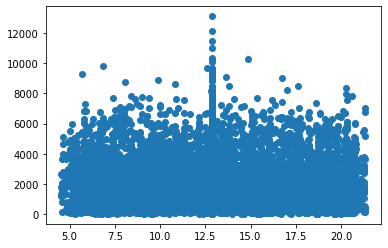

In [45]:
plt.scatter(df.Item_Weight, df.Item_Outlet_Sales)
plt.show()

# Samples are uncorrelated


Finding Correlation Between Item_MRP and Item_Outlet_Sales

In [46]:
# The Pearson correlation coefficient (named for Karl Pearson) 
# can be used to summarize the strength of the linear relationship between two data samples.


from scipy.stats import pearsonr
corr, _ = pearsonr(df.Item_MRP, df.Item_Outlet_Sales)
print('Pearsons correlation: %.3f' % corr)

# It has a Linear Correlation

Pearsons correlation: 0.568


In [47]:
# Two variables may be related by a nonlinear relationship,
# such that the relationship is stronger or weaker across 
# the distribution of the variables.

# In this case, the Spearman’s correlation coefficient 
# (named for Charles Spearman) can be used to summarize 
# the strength between the two data samples.


from scipy.stats import spearmanr

coef, p = spearmanr(df.Item_MRP, df.Item_Outlet_Sales)
print('Spearmans correlation coefficient: %.3f' % coef)

alpha = 0.05 
       
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.563
Samples are correlated (reject H0) p=0.000


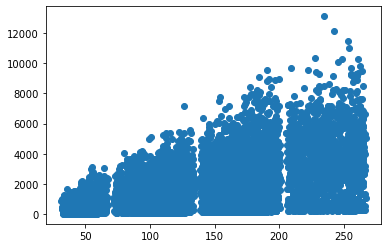

In [48]:
plt.scatter(df.Item_MRP, df.Item_Outlet_Sales)
plt.show()

# Samples are correlated

In [49]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,249.8092,OUT049,14,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,48.2692,OUT018,4,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,141.6180,OUT049,14,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.070482,182.0950,OUT010,15,Other,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Low Fat,0.070482,53.8614,OUT013,26,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


In [50]:
df.isnull().sum()  # Now we dont have any Null values

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Type_Combined           0
dtype: int64

In [51]:
print(df_t.shape)


(5681, 11)


In [52]:
df_t.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [53]:
df.head() 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,249.8092,OUT049,14,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,48.2692,OUT018,4,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,141.6180,OUT049,14,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.070482,182.0950,OUT010,15,Other,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Low Fat,0.070482,53.8614,OUT013,26,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


Hot Encoding

In [54]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Item_Type_Combined            object
dtype: object

In [55]:
#One Hot Coding
df = pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet_Identifier'])


In [56]:
# Just shifting Item_Outlet_Sales at last

df1 = df.pop('Item_Outlet_Sales') # remove column b and store it in df1

df['Item_Outlet_Sales']=df1 # add b series as a 'new' column.


In [57]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,...,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Outlet_Sales
0,FDA15,9.30,0.016047,249.8092,14,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,3735.1380
1,DRC01,5.92,0.019278,48.2692,4,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,443.4228
2,FDN15,17.50,0.016760,141.6180,14,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,2097.2700
3,FDX07,19.20,0.070482,182.0950,15,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,732.3800
4,NCD19,8.93,0.070482,53.8614,26,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,994.7052


In [58]:
df.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_MRP                             float64
Outlet_Establishment_Year              int64
Item_Fat_Content_Low Fat               uint8
Item_Fat_Content_Regular               uint8
Outlet_Location_Type_Tier 1            uint8
Outlet_Location_Type_Tier 2            uint8
Outlet_Location_Type_Tier 3            uint8
Outlet_Size_High                       uint8
Outlet_Size_Medium                     uint8
Outlet_Size_Other                      uint8
Outlet_Size_Small                      uint8
Outlet_Type_Grocery Store              uint8
Outlet_Type_Supermarket Type1          uint8
Outlet_Type_Supermarket Type2          uint8
Outlet_Type_Supermarket Type3          uint8
Item_Type_Combined_Drinks              uint8
Item_Type_Combined_Food                uint8
Item_Type_Combined_Non-Consumable      uint8
Outlet_Identifier_OUT010               uint8
Outlet_Ide

In [59]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,...,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Outlet_Sales
0,FDA15,9.30,0.016047,249.8092,14,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,3735.1380
1,DRC01,5.92,0.019278,48.2692,4,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,443.4228
2,FDN15,17.50,0.016760,141.6180,14,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,2097.2700
3,FDX07,19.20,0.070482,182.0950,15,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,732.3800
4,NCD19,8.93,0.070482,53.8614,26,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,994.7052


Linear (Multiple) Regression

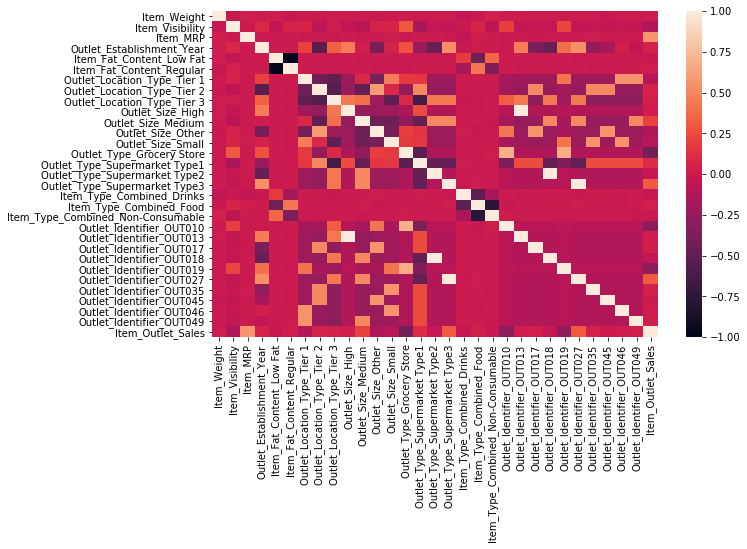

In [60]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr())

# Correlation Heat map

#  A positive correlation indicates that the variables move in the same direction, 
#  while a negative correlation indicates that the variables move in opposite directions.

# Regression

In [61]:
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

from yellowbrick.regressor import residuals_plot
from yellowbrick.datasets import load_concrete
from sklearn.ensemble import RandomForestRegressor

Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [62]:
y=df['Item_Outlet_Sales']
x=df[['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Outlet_Location_Type_Tier 1',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3',
       'Item_Type_Combined_Drinks', 'Item_Type_Combined_Food',
       'Item_Type_Combined_Non-Consumable', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049']]


# y=df['Item_Outlet_Sales']
# x=df[['Item_Weight']]


In [85]:
model = LinearRegression()
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.2)    # Splitting Data

# performing Linear regression

model.fit(x_train,y_train )           

y_pred = model.predict(x)
print('Prediction of test data :- ',model.predict(x_test[0:5]))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,model.predict(x_test))))
print('MSE = ',mean_squared_error(y, y_pred))
print('Test Score:- ',model.score(x_test,y_test))



Prediction of test data :-  [7.64679526 7.35846906 5.44233493 7.79367062 6.83485512]
Mean Absolute Error : 0.4164777607993151
MSE =  0.28908004091482337
Test Score:-  0.7112916006658128


In [86]:
predictions = model.predict(x_test)


from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
scores = cross_val_score(model,x_test,y_test, cv=6)
print ('Cross-validated scores:', scores)
accuracy = metrics.r2_score(y_test, predictions)
print ('Cross-Predicted Accuracy:', accuracy)
print("R2 score is:- ",metrics.r2_score(y,y_pred))
comp=accuracy



Cross-validated scores: [0.73116413 0.70781691 0.72780458 0.69664453 0.68091068 0.70016616]
Cross-Predicted Accuracy: 0.7112916006658127
R2 score is:-  0.7205303098862117


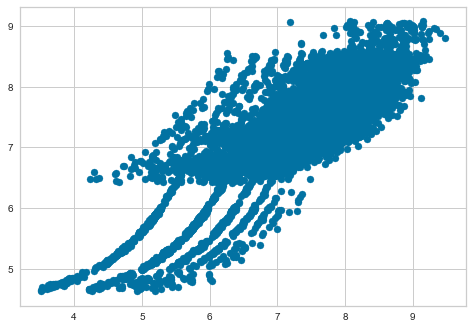

In [87]:
predictions = cross_val_predict(model, x, y, cv=6)
plt.scatter(y, predictions)


# Random Forest

Prediction of test data :-  [5.28591335 7.82173991 6.41695068 8.29416467 7.84244963]
Mean Absolute Error : 0.42648614954420333
MSE =  0.09501302889347486
Test Score:-  0.7091290507693429
Cross-validated scores: [0.71141176 0.63258748 0.71435016 0.71225951 0.71321289 0.76923035]
Cross-Predicted Accuracy: 0.7091290507693429
R2 score is:-  0.9081456414022866


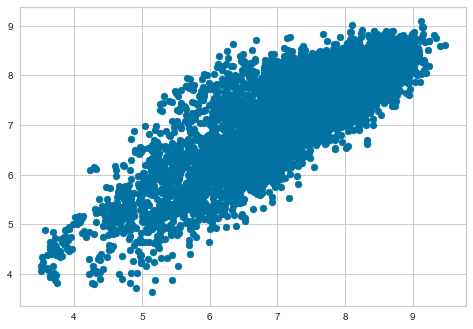

In [88]:
model = RandomForestRegressor()
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.2)    # Splitting Data

# performing Linear regression

model.fit(x_train,y_train )                                   
y_pred = model.predict(x)
print('Prediction of test data :- ',model.predict(x_test[0:5]))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,model.predict(x_test))))
print('MSE = ',mean_squared_error(y, y_pred))
print('Test Score:- ',model.score(x_test,y_test))

predictions = model.predict(x_test)


from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
scores = cross_val_score(model,x_test,y_test, cv=6)
print ('Cross-validated scores:', scores)
accuracy = metrics.r2_score(y_test, predictions)
print ('Cross-Predicted Accuracy:', accuracy)
print("R2 score is:- ",metrics.r2_score(y,y_pred))


predictions = cross_val_predict(model, x, y, cv=6)
plt.scatter(y, predictions)



In [89]:
print("Diffrence between Gradient Rendom forest algo and normal linear regression algo:- ",(accuracy-comp)*100,'%')


Diffrence between Gradient Rendom forest algo and normal linear regression algo:-  -0.2162549896469801 %


# Gradient Boosting

In [90]:
# Gradient Boosting

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.01,max_depth=6)

my_model.fit(x_train,y_train)

predictions = my_model.predict(x_test)



In [91]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

scores = cross_val_score(model,x_test,y_test, cv=6)
print ('Cross-validated scores:', scores)
accuracy = metrics.r2_score(y_test, predictions)

print("Mean Absolute Error : " + str(mean_absolute_error(y_test,predictions)))
print ('Cross-Predicted Accuracy:', accuracy)
print("R2 score is:- ",metrics.r2_score(y,y_pred))



Cross-validated scores: [0.71594806 0.63668127 0.71209977 0.71942047 0.71379673 0.76164455]
Mean Absolute Error : 0.4083199236457798
Cross-Predicted Accuracy: 0.7294042858138741
R2 score is:-  0.9081456414022866


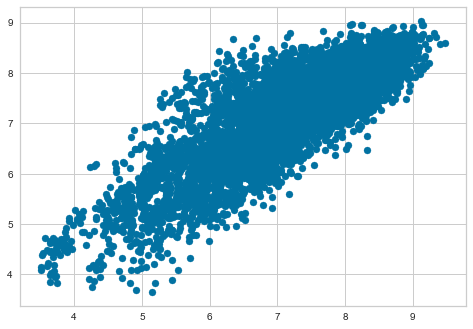

In [92]:
predictions = cross_val_predict(model, x, y, cv=6)
plt.scatter(y, predictions)

# Residual Graphs

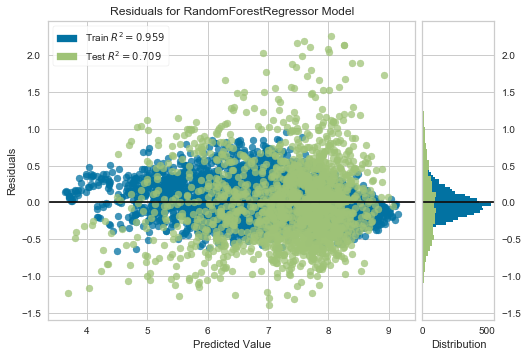

In [93]:
viz = residuals_plot(model, x_train, y_train, x_test, y_test)    # Residuals for Linear Rgression

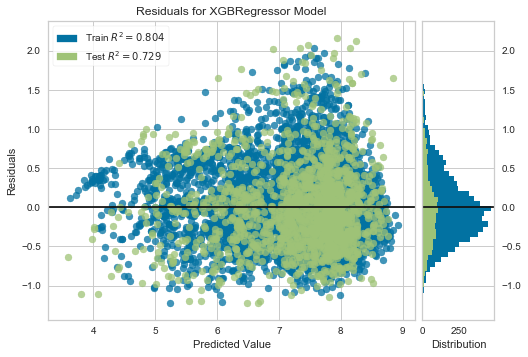

In [94]:
viz = residuals_plot(my_model, x_train, y_train, x_test, y_test)           # Residuals for XGboost

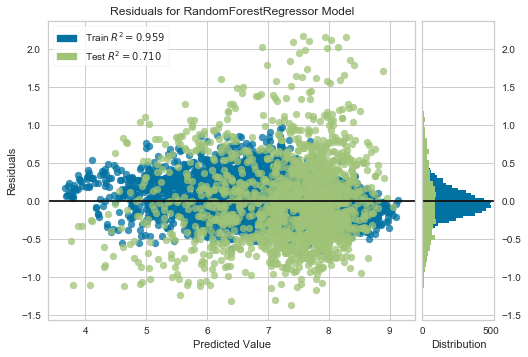

In [95]:
viz = residuals_plot(RandomForestRegressor(), x_train, y_train, x_test, y_test)       # Residuals for Random forest

# Preparing data from test file

In [74]:

# Preparing data from test file


df_t["Item_Fat_Content"]= df_t["Item_Fat_Content"].str.replace("low fat", "Low Fat", case = True)

df_t["Item_Fat_Content"]= df_t["Item_Fat_Content"].str.replace("LF", "Low Fat", case = True)

df_t["Item_Fat_Content"]= df_t["Item_Fat_Content"].str.replace("reg", "Regular", case = True)


df_t['Item_Visibility'] = df_t['Item_Visibility'].replace(0.000000, np.nan)   # first change the 0.00 value with NaN
df_t['Item_Visibility'].fillna((df_t['Item_Visibility'].mean()), inplace=True)
df_t['Item_Weight'].fillna((df_t['Item_Weight'].mean()), inplace=True)


df_t['Item_Type_Combined'] = df_t['Item_Identifier'].apply(lambda x: x[0:2])            #First two characters of Item_Identifier
 
df_t['Item_Type_Combined'] = df_t['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})    #Rename
df_t['Item_Type_Combined'].value_counts()  

df_t=df_t.drop(['Item_Type'], axis=1)    # Removing Item_Type (No Longer Needed since features has been extracted)


df_t['Item_Weight'].fillna((df_t['Item_Weight'].mean()), inplace=True)


df_t.Outlet_Size=df_t.Outlet_Size.fillna('Other')



df_t = pd.get_dummies(df_t, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet_Identifier'])



df_t["Item_Outlet_Sales"] = ""       # Adding new column for Prediction use



In [75]:
df_t.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,...,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Outlet_Sales
0,FDW58,20.750000,0.007565,107.8622,1999,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,
1,FDW14,8.300000,0.038428,87.3198,2007,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,
2,NCN55,14.600000,0.099575,241.7538,1998,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,
3,FDQ58,7.315000,0.015388,155.0340,2007,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,
4,FDY38,12.695633,0.118599,234.2300,1985,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,


In [76]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,...,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Outlet_Sales
0,FDA15,9.30,0.016047,249.8092,14,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,3735.1380
1,DRC01,5.92,0.019278,48.2692,4,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,443.4228
2,FDN15,17.50,0.016760,141.6180,14,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,2097.2700
3,FDX07,19.20,0.070482,182.0950,15,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,732.3800
4,NCD19,8.93,0.070482,53.8614,26,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,994.7052


In [77]:
#Import models from scikit learn module: 
from sklearn.linear_model import LogisticRegression 
#from sklearn.cross_validation import KFold  
from sklearn.model_selection import KFold 
#new versions of python support this, if old then use above comment 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier, export_graphviz 
from sklearn import metrics 
import sklearn.metrics
from sklearn.preprocessing import LabelEncoder
# Metrics for root mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression # Import Linear Regression

In [78]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,...,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Outlet_Sales
0,FDA15,9.30,0.016047,249.8092,14,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,3735.1380
1,DRC01,5.92,0.019278,48.2692,4,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,443.4228
2,FDN15,17.50,0.016760,141.6180,14,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,2097.2700
3,FDX07,19.20,0.070482,182.0950,15,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,732.3800
4,NCD19,8.93,0.070482,53.8614,26,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,994.7052


# Linear Regression

In [79]:
df=df.drop(['Item_Identifier'], axis=1)
df_t=df_t.drop(['Item_Identifier'], axis=1)
# df_t=df_t.drop(['Item_Identifier'], axis=1)
# df_t['Item_Outlet_Sales'].convert_objects(convert_numeric=True)
# df_t['Item_Outlet_Sales']=pd.to_numeric(df['Item_Outlet_Sales'], errors='coerce')


In [80]:
dftrain=df
dftest=df_t

X_train = dftrain
X_test = dftest



y_train = dftrain['Item_Outlet_Sales']

lr = LinearRegression();

# Fit the model on our data
lr.fit(X_train, y_train)

# Predict training set
y_test = lr.predict(X_train)
print("Mean Square Error:- ",sqrt(mean_squared_error(np.log(y_train), np.log(y_test))))

Mean Square Error:-  2.3720341502695053e-15


In [81]:
# taking the log of response variable

y = np.log(dftrain.Item_Outlet_Sales)

lr = LinearRegression();

# Fit the model on our data
lr.fit(X_train, y)

# Predict training set
y_pred = lr.predict(X_train)
print("Mean Square Error:- ",sqrt(mean_squared_error(np.log(y), np.log(y_pred))))

Mean Square Error:-  0.0597705799458218


In [82]:
print("R2 score is:- ",metrics.r2_score(y,y_pred))

R2 score is:-  0.8701288183758886


In [83]:
print("Maximum residual error:- ",metrics.max_error(y, y_pred))

Maximum residual error:-  2.1344172347772394


resources used

In [84]:

# Finding correlation
# https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/

# Seaborn color and figure setting
# https://www.codecademy.com/articles/seaborn-design-ii

#https://scikit-learn.org/

# https://heartbeat.fritz.ai/implementing-multiple-linear-regression-using-sklearn-43b3d3f2fe8b
# https://blog.exploratory.io/introduction-to-extreme-gradient-boosting-in-exploratory-7bbec554ac7